In [1]:
import pandas as pd

In [28]:
# specify the columns needed and their desired datatypes
lst_str_cols = ['WHEELS_OFF', 'WHEELS_ON', 'AIR_TIME', 'scheduledDeparture_key', 'scheduledArrival_key', 'dateKey']
dict_dtypes = {x: 'str' for x in lst_str_cols}

fact = pd.read_csv('CSV/flights_fact.csv', dtype=dict_dtypes)
fact.shape

C:\Users\Philippos\AppData\Local\Temp\ipykernel_18832\1612954107.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  fact = pd.read_csv('CSV/flights_fact.csv', dtype=dict_dtypes)


array([[<AxesSubplot: title={'center': 'DEPARTURE_DELAY'}>,
        <AxesSubplot: title={'center': 'TAXI_OUT'}>,
        <AxesSubplot: title={'center': 'SCHEDULED_TIME'}>,
        <AxesSubplot: title={'center': 'ELAPSED_TIME'}>],
       [<AxesSubplot: title={'center': 'DISTANCE'}>,
        <AxesSubplot: title={'center': 'TAXI_IN'}>,
        <AxesSubplot: title={'center': 'ARRIVAL_TIME'}>,
        <AxesSubplot: title={'center': 'ARRIVAL_DELAY'}>],
       [<AxesSubplot: title={'center': 'DIVERTED'}>,
        <AxesSubplot: title={'center': 'CANCELLED'}>,
        <AxesSubplot: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot: title={'center': 'SECURITY_DELAY'}>],
       [<AxesSubplot: title={'center': 'AIRLINE_DELAY'}>,
        <AxesSubplot: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <AxesSubplot: title={'center': 'WEATHER_DELAY'}>,
        <AxesSubplot: >]], dtype=object)

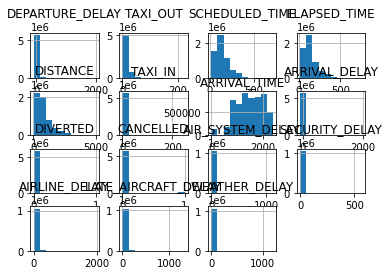

In [32]:
# get an overview of the numeric columns
fact.loc[:,'DEPARTURE_DELAY':].hist()

In [33]:
# filter the flights with outlier values in the departure delay columns
fact = fact[(fact['DEPARTURE_DELAY'] <= fact['DEPARTURE_DELAY'].quantile(0.95)) & 
           (fact['DEPARTURE_DELAY'] >= fact['DEPARTURE_DELAY'].quantile(0.01))]

In [34]:
# filter the flights with outlier values in the arrival delay columns
fact = fact[(fact['ARRIVAL_DELAY'] <= fact['ARRIVAL_DELAY'].quantile(0.97)) & 
           (fact['ARRIVAL_DELAY'] >= fact['ARRIVAL_DELAY'].quantile(0.01))]

In [35]:
# do the same for taxi_in, taxi_out and weather delay values
fact = fact[(fact['TAXI_IN'] <= fact['TAXI_IN'].quantile(0.97)) & 
           (fact['TAXI_IN'] >= fact['TAXI_IN'].quantile(0.005))]

fact = fact[(fact['TAXI_OUT'] <= fact['TAXI_OUT'].quantile(0.97)) & 
           (fact['TAXI_OUT'] >= fact['TAXI_OUT'].quantile(0.005))]

fact['WEATHER_DELAY'].hist(), fact['WEATHER_DELAY'].quantile(0.95), fact['WEATHER_DELAY'].quantile(0.01)

(<AxesSubplot: >, 29.0)

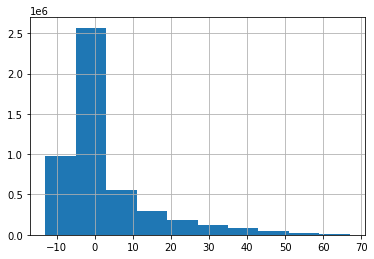

In [38]:
# get an overview of the new data
fact['DEPARTURE_DELAY'].hist(), fact['DEPARTURE_DELAY'].quantile(0.95)

In [40]:
fact.loc[:,['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'WHEELS_OFF', 'AIR_TIME', 'WHEELS_ON']].head(8)

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,WHEELS_OFF,AIR_TIME,WHEELS_ON
0,ANC,SEA,0015,169.0,0404
1,LAX,PBI,0014,263.0,0737
2,SFO,CLT,0034,266.0,0800
3,LAX,MIA,0030,258.0,0748
4,SEA,ANC,0035,199.0,0254
5,SFO,MSP,0038,206.0,0604
6,LAS,MSP,0030,154.0,0504
7,LAX,CLT,0057,228.0,0745


array([[<AxesSubplot: title={'center': 'FLIGHT_NUMBER'}>,
        <AxesSubplot: title={'center': 'DEPARTURE_TIME'}>,
        <AxesSubplot: title={'center': 'DEPARTURE_DELAY'}>,
        <AxesSubplot: title={'center': 'TAXI_OUT'}>],
       [<AxesSubplot: title={'center': 'SCHEDULED_TIME'}>,
        <AxesSubplot: title={'center': 'ELAPSED_TIME'}>,
        <AxesSubplot: title={'center': 'DISTANCE'}>,
        <AxesSubplot: title={'center': 'TAXI_IN'}>],
       [<AxesSubplot: title={'center': 'ARRIVAL_TIME'}>,
        <AxesSubplot: title={'center': 'ARRIVAL_DELAY'}>,
        <AxesSubplot: title={'center': 'DIVERTED'}>,
        <AxesSubplot: title={'center': 'CANCELLED'}>],
       [<AxesSubplot: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot: title={'center': 'SECURITY_DELAY'}>,
        <AxesSubplot: title={'center': 'AIRLINE_DELAY'}>,
        <AxesSubplot: title={'center': 'LATE_AIRCRAFT_DELAY'}>],
       [<AxesSubplot: title={'center': 'WEATHER_DELAY'}>,
        <AxesSubplot: >

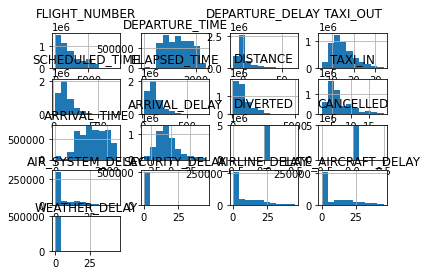

In [42]:
fact.hist()

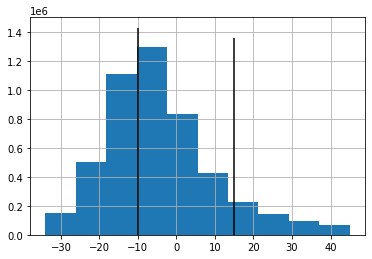

In [43]:
# plot the arrival delay column and mark the -10 and 15 minutes as the boundaries in which a flight is considered to arrive early,
# be on time and delayed

import matplotlib.pyplot as plt
ax = fact['ARRIVAL_DELAY'].hist()
plt.vlines(x = 15, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors='black')
plt.vlines(x = -10, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors='black')

In [44]:
fact['ARRIVAL_DELAY'].mean()

-4.404895344847306

In [45]:
early = fact['ARRIVAL_DELAY'].le(-10).mean() 
delayed = fact['ARRIVAL_DELAY'].ge(15).mean()
on_time = fact['ARRIVAL_DELAY'].between(-10, 15, inclusive='both').mean()

print(f'{early * 100:.2f}% of flights are early')
print(f'{on_time * 100:.2f}% of flights are on-time')
print(f'{delayed * 100:.2f}% of flights are delayed')

39.87% of flights are early
53.97% of flights are on-time
10.34% of flights are delayed


In [47]:
# generate the early, on_time and delayed boolean variables
fact['early'] = 0 
fact['on_time'] = 0
fact['delayed'] = 0 

In [48]:
# use the logic described above
fact['early'] = fact['ARRIVAL_DELAY'].apply(lambda x: 1 if (x < -10)else 0 )
fact['on_time'] = fact['ARRIVAL_DELAY'].apply(lambda x: 1 if ((x >= -10) & (x <= 10))else 0 )
fact['delayed'] = fact['ARRIVAL_DELAY'].apply(lambda x: 1 if ( x >= 10 ) else 0 )

In [49]:
fact['new_delay'] = fact['ARRIVAL_DELAY'].apply(lambda x: 0 if ((x >= -10) & (x <= 10))else x )

In [50]:
fact['early'].mean()

0.36368751323192433

In [52]:
# save the cleaned dataset into a new csv file 
# the table containing the calculations is considered to be the fact table in a datawarehouse
fact.to_csv('CSV/flights_fact.csv', index=False)